In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_csv("metrics.csv") 


print(df.shape)
print(df.columns)
df.sample(2)

(500, 20)
Index(['run_name', 'arc_features', 'arc_encoder_blocks', 'arc_num_params',
       'arc_latent_volume', 'arc_num_conv', 'arc_skip', 'train_swaps',
       'train_loss', 'valid_loss', 'test_loss', 'valid_F1', 'train_F1',
       'test_F1', 'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')


,run_name,arc_features,arc_encoder_blocks,arc_num_params,arc_latent_volume,arc_num_conv,arc_skip,train_swaps,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
102,nc_2_n4_0_n8_1_skip1_noise0.7,"[4, 8]",1,692,512.0,2,1,0.7,0.137938,0.070307,0.072509,0.996438,0.474212,0.997795,0.474212,0.996438,0.997795,0.0,0.0,0.0
223,nc_2_n4_1_n8_0_skip0_noise0.0,"[4, 4]",1,380,256.0,2,0,0.0,0.078948,0.074048,0.079960,0.701075,0.709867,0.687061,0.709867,0.701075,0.687061,0.0,0.0,0.0


In [15]:
sns.set_theme(style="whitegrid", palette="pastel")

In [6]:
df.sort_values(
    ["test_Accuracy","valid_Accuracy", "arc_features", "arc_num_params", "arc_latent_volume", "arc_skip"]
)
data_c_skips = df[df["arc_skip"] == 1]
data_c_no_skips = df[df["arc_skip"] == 0]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

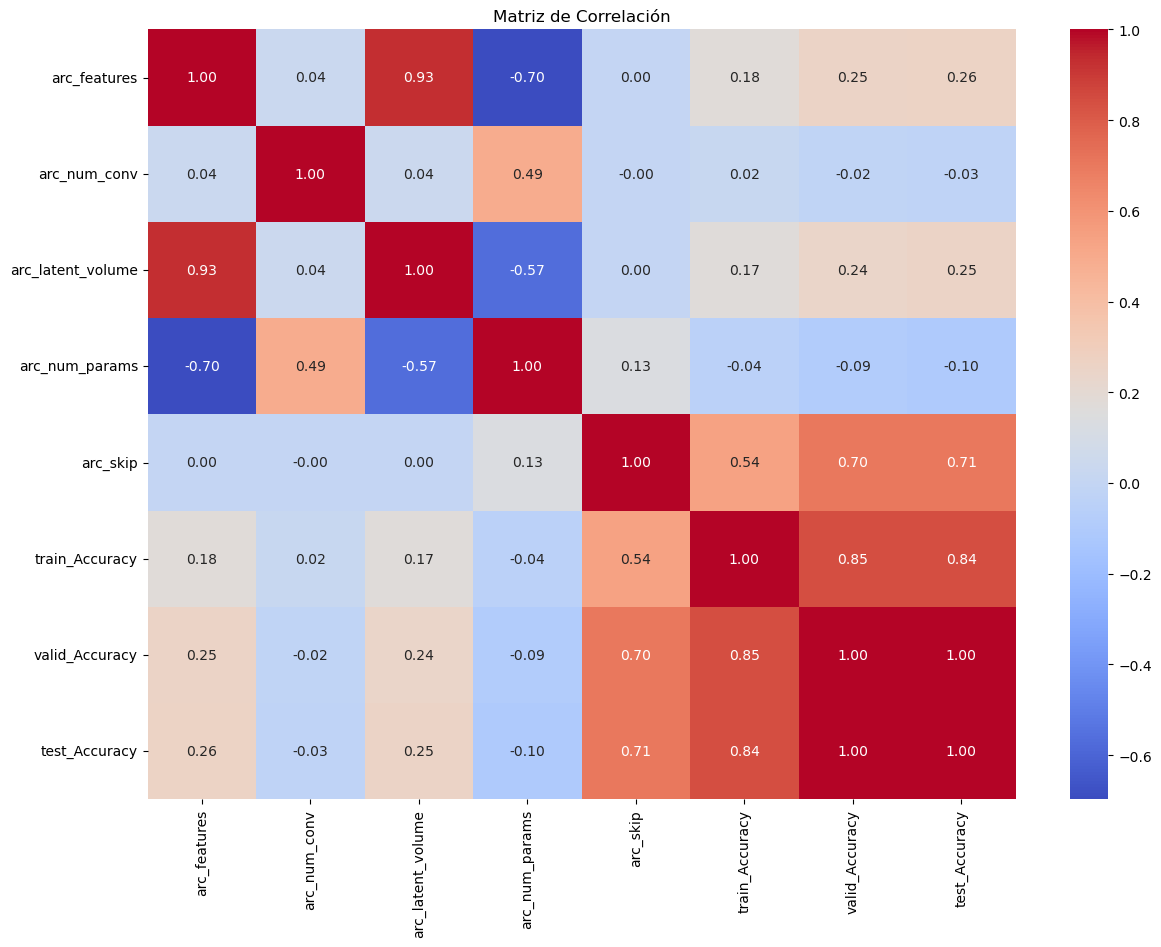

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar un subconjunto de variables importantes:
# Variables de arquitectura e hiperparámetros
cols_arq = [
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
    "arc_num_params",
    "arc_skip",
]
# Métricas de rendimiento
cols_perf = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]

# Como 'arc_skip' es categórica (0/1 o similar), la transformamos a numérica si es necesario
if df["arc_skip"].dtype == "object":
    df["arc_skip"] = df["arc_skip"].astype("category").cat.codes

# Como 'arc_skip' es categórica (0/1 o similar), la transformamos a numérica si es necesario
if df["arc_features"].dtype == "object":
    df["arc_features"] = df["arc_features"].astype("category").cat.codes
# Crear un DataFrame solo con las columnas de interés
df_subset = df[cols_arq +  cols_perf]

# Matriz de correlación completa
corr_matrix = df_subset.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [22]:
# Filtrar modelos según skip connection
data_skip0 = df[df["arc_skip"] == 0]
data_skip1 = df[df["arc_skip"] == 1]

print("Modelos sin Skip Connections:", data_skip0.shape[0])
print("Modelos con Skip Connections:", data_skip1.shape[0])


cols_arq = [
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
    "arc_num_params",
    "train_swaps"
]
# Métricas de rendimiento
cols_perf = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]

Modelos sin Skip Connections: 250
Modelos con Skip Connections: 250


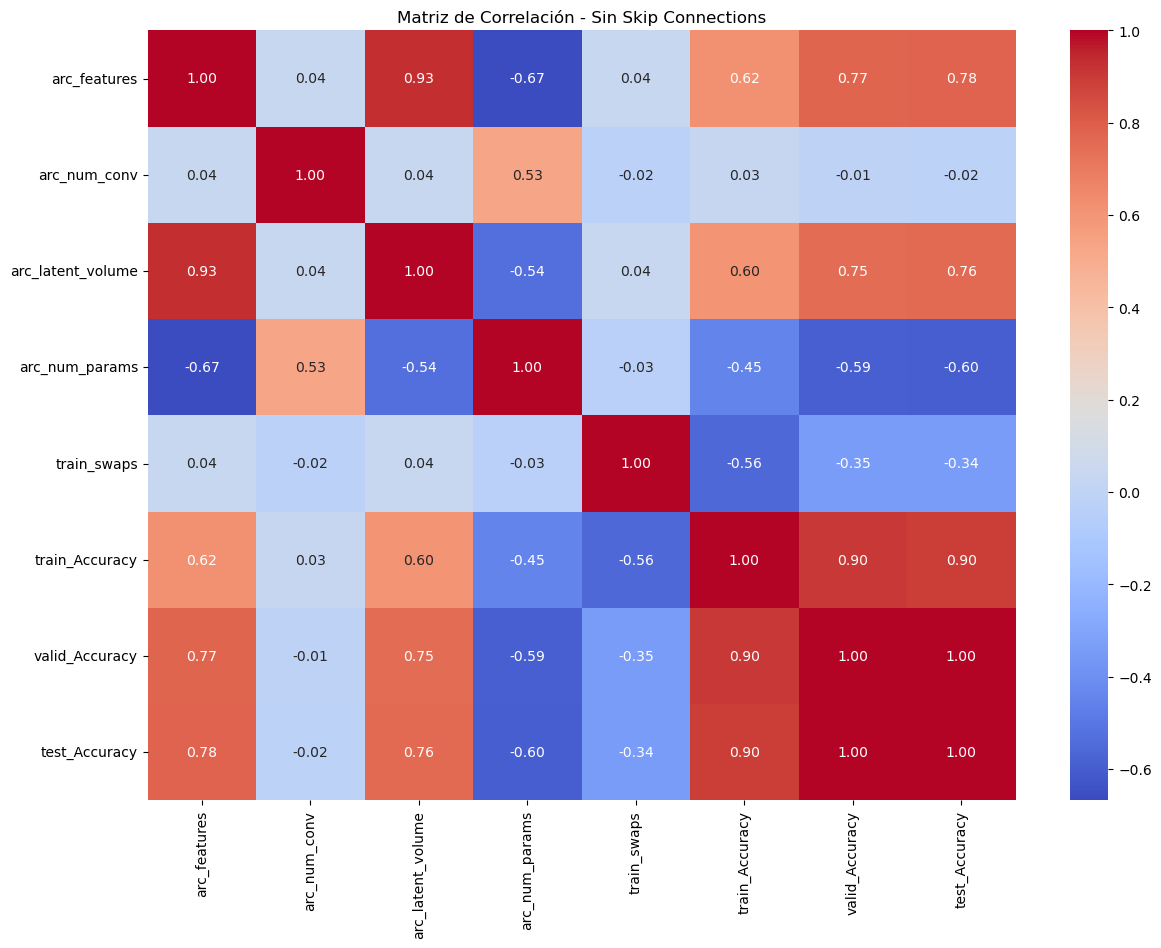

In [23]:
df["arc_features"] = df["arc_features"].astype("category").cat.codes
# Crear un DataFrame solo con las columnas de interés
df_subset = data_skip0[cols_arq +  cols_perf]

# Matriz de correlación completa
corr_matrix = df_subset.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Sin Skip Connections")
plt.show()

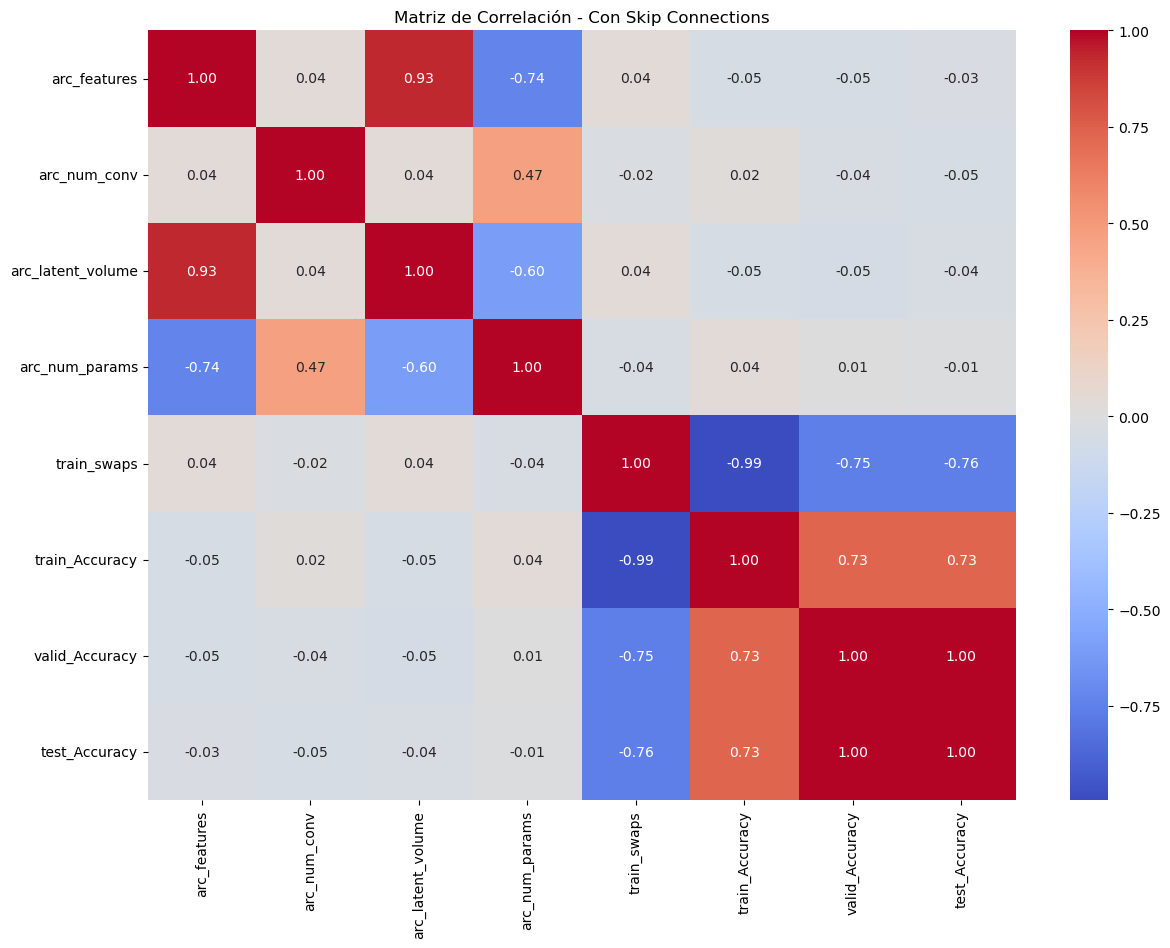

In [24]:
df["arc_features"] = df["arc_features"].astype("category").cat.codes
# Crear un DataFrame solo con las columnas de interés
df_subset = data_skip1[cols_arq +  cols_perf]

# Matriz de correlación completa
corr_matrix = df_subset.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Con Skip Connections")
plt.show()

In [40]:
# Estadísticas para cada grupo
print("Estadísticas (sin skip connections):")
print(data_skip0[["train_Accuracy", "valid_Accuracy", "test_Accuracy"]].describe())

print("\nEstadísticas (con skip connections):")
print(data_skip1[["train_Accuracy", "valid_Accuracy", "test_Accuracy"]].describe())

Estadísticas (sin skip connections):
       train_Accuracy  valid_Accuracy  test_Accuracy
count       64.000000       64.000000      64.000000
mean         0.821572        0.819952       0.817044
std          0.013746        0.004464       0.008676
min          0.797844        0.812769       0.801960
25%          0.807640        0.816087       0.809057
50%          0.823102        0.820606       0.817606
75%          0.832242        0.822609       0.824707
max          0.851947        0.829739       0.833319

Estadísticas (con skip connections):
       train_Accuracy  valid_Accuracy  test_Accuracy
count       64.000000       64.000000      64.000000
mean         0.924999        0.932486       0.928098
std          0.055627        0.050599       0.054138
min          0.822910        0.834572       0.822670
25%          0.883918        0.892476       0.887756
50%          0.922423        0.928158       0.923698
75%          0.989897        0.992726       0.992190
max          0.999896   

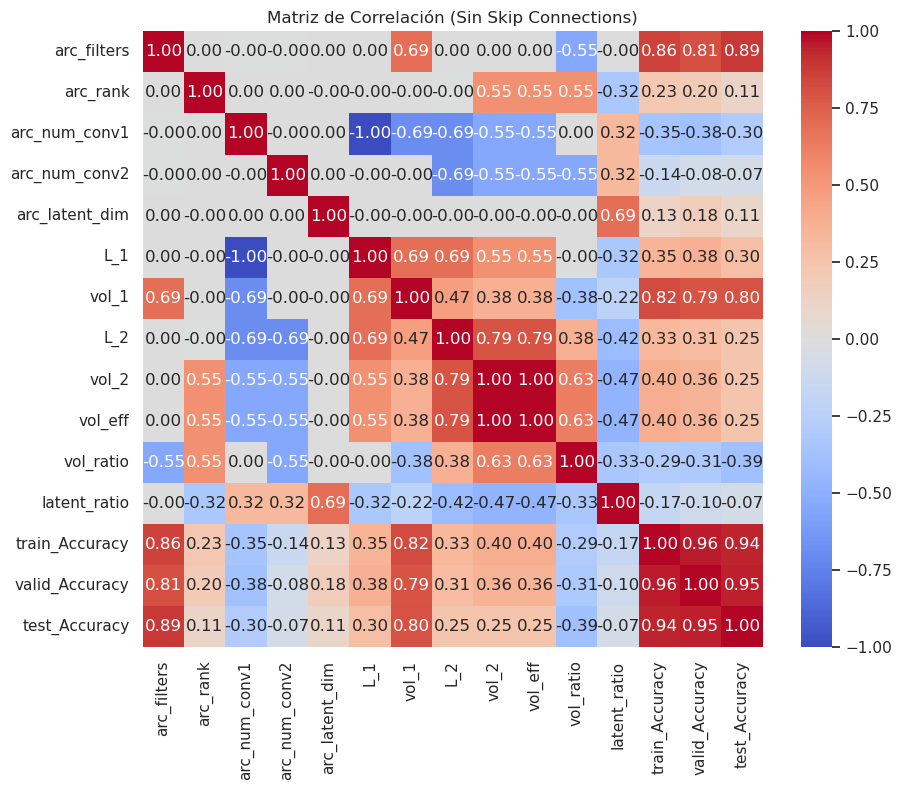

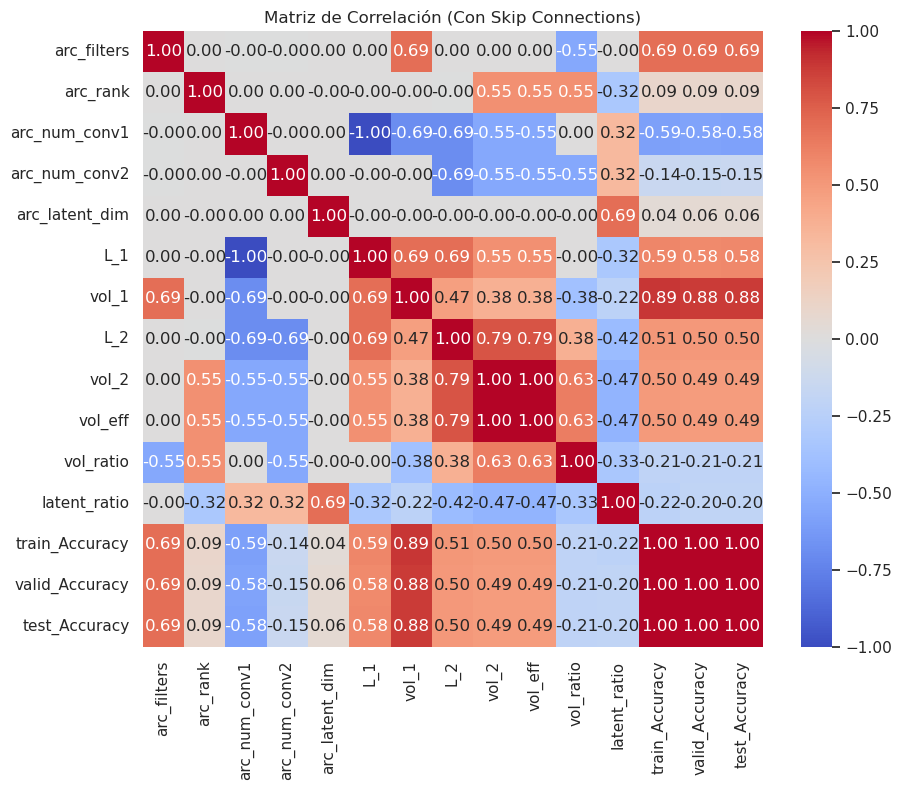

In [ ]:
# Función para graficar la matriz de correlación
def graficar_correlacion(df, titulo):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(titulo)
    plt.show()


cols_arq = [
    "arc_num_params",
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
]
# Variables de volumen/latencia
cols_vol = ["L_1", "vol_1", "L_2", "vol_2", "vol_eff", "vol_ratio", "latent_ratio"]
# Métricas de rendimiento
cols_perf = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]
cols_interes = cols_arq + cols_vol + cols_perf
# Matriz para modelos sin skip
graficar_correlacion(
    data_skip0[cols_interes], "Matriz de Correlación (Sin Skip Connections)"
)

# Matriz para modelos con skip
graficar_correlacion(
    data_skip1[cols_interes], "Matriz de Correlación (Con Skip Connections)"
)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Listas de campos
cols_arq = [
    "arc_num_params",
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
    # "arc_skip",
]
cols_vol = ["L_1", "vol_1", "L_2", "vol_2", "vol_eff", "vol_ratio", "latent_ratio"]
accuracy_field = "test_Accuracy"
fields = cols_arq + cols_vol


def plot_accuracy_by_fields(df, fields, accuracy_field, ncols=3, title_suffix=""):
    """
    Genera boxplots de la accuracy en función de cada campo.

    Parámetros:
      - df: DataFrame sobre el que graficar.
      - fields: Lista de campos a analizar.
      - accuracy_field: Campo de rendimiento (ej. test_Accuracy).
      - ncols: Número de columnas en la grilla de subplots.
      - title_suffix: Sufijo para incluir en cada título (ej. "(Con Skip)").
    """
    nfields = len(fields)
    nrows = (nfields + ncols - 1) // ncols  # redondeo hacia arriba
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))
    axs = axs.flatten()

    for i, field in enumerate(fields):
        # Trabajamos sobre una copia para evitar modificar el DataFrame original
        df_tmp = df.copy()

        # Si la variable es numérica y tiene muchos valores únicos, se crean 4 bins
        if (
            pd.api.types.is_numeric_dtype(df_tmp[field])
            and df_tmp[field].nunique() > 10
        ):
            try:
                df_tmp["bin"] = pd.qcut(df_tmp[field], q=4, duplicates="drop")
            except Exception:
                df_tmp["bin"] = df_tmp[field]
        else:
            df_tmp["bin"] = df_tmp[field]

        sns.boxplot(
            x="bin",
            y=accuracy_field,
            data=df_tmp,
            ax=axs[i],
            palette="Set2",
        )
        axs[i].set_title(f"{accuracy_field} vs {field} {title_suffix}")
        axs[i].set_xlabel(field)
        axs[i].set_ylabel(accuracy_field)
        axs[i].tick_params(axis="x", rotation=45)

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


# Filtrar el DataFrame según la presencia de skip connections
data_skip = df[df["arc_skip"] == 1]
data_no_skip = df[df["arc_skip"] == 0]

/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning

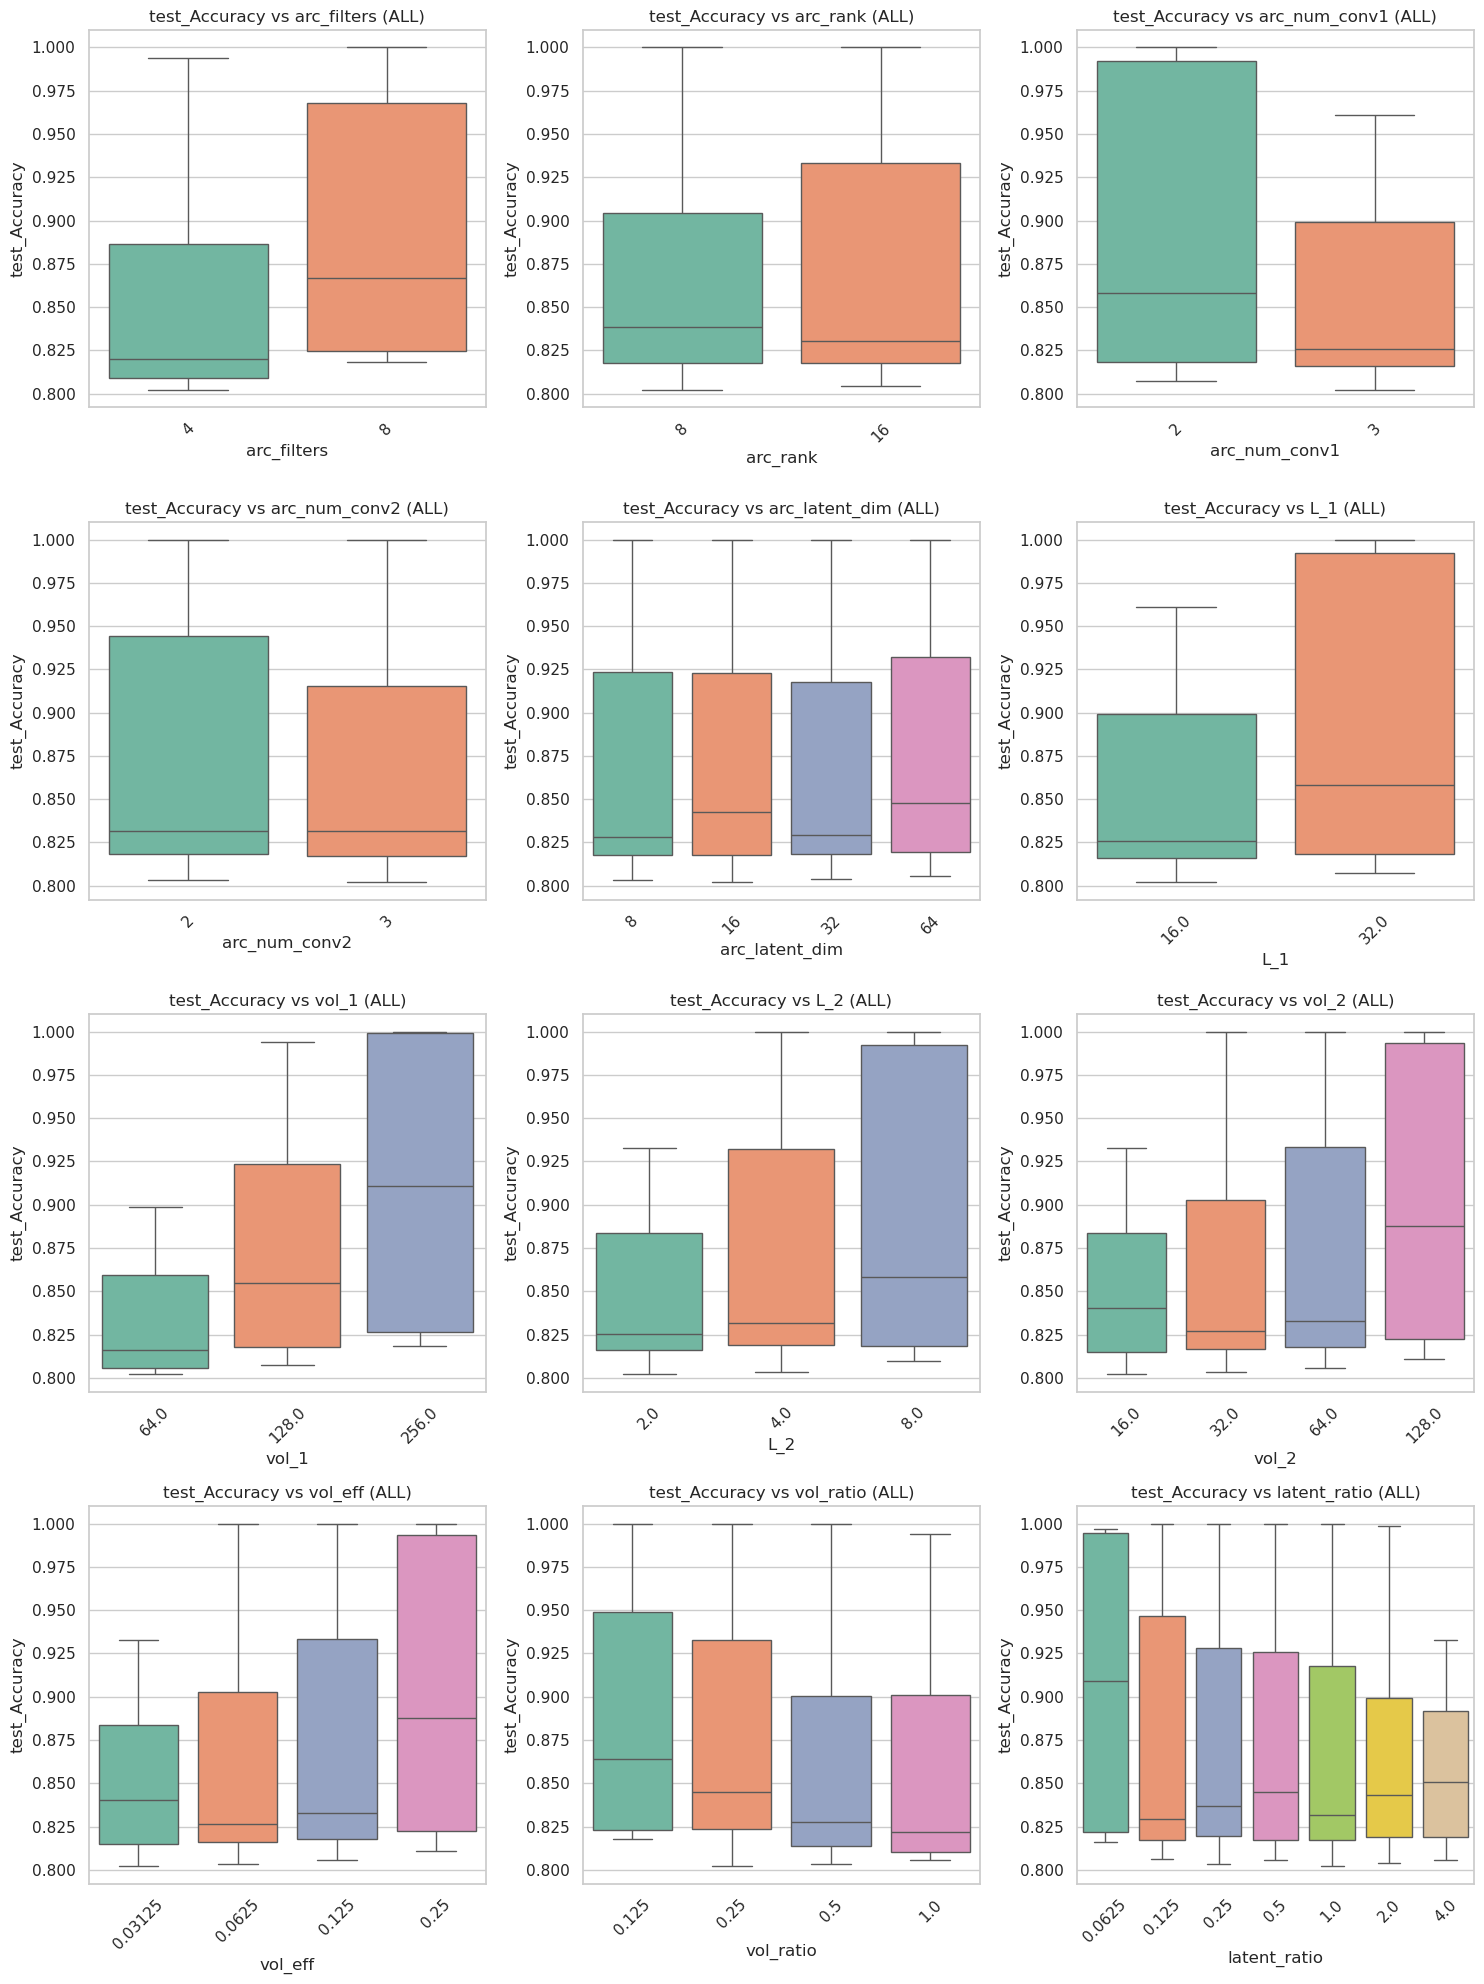

In [ ]:
# Versión para modelos CON skip connections
plot_accuracy_by_fields(
    df, fields, accuracy_field, ncols=3, title_suffix="(ALL)"
)

/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning

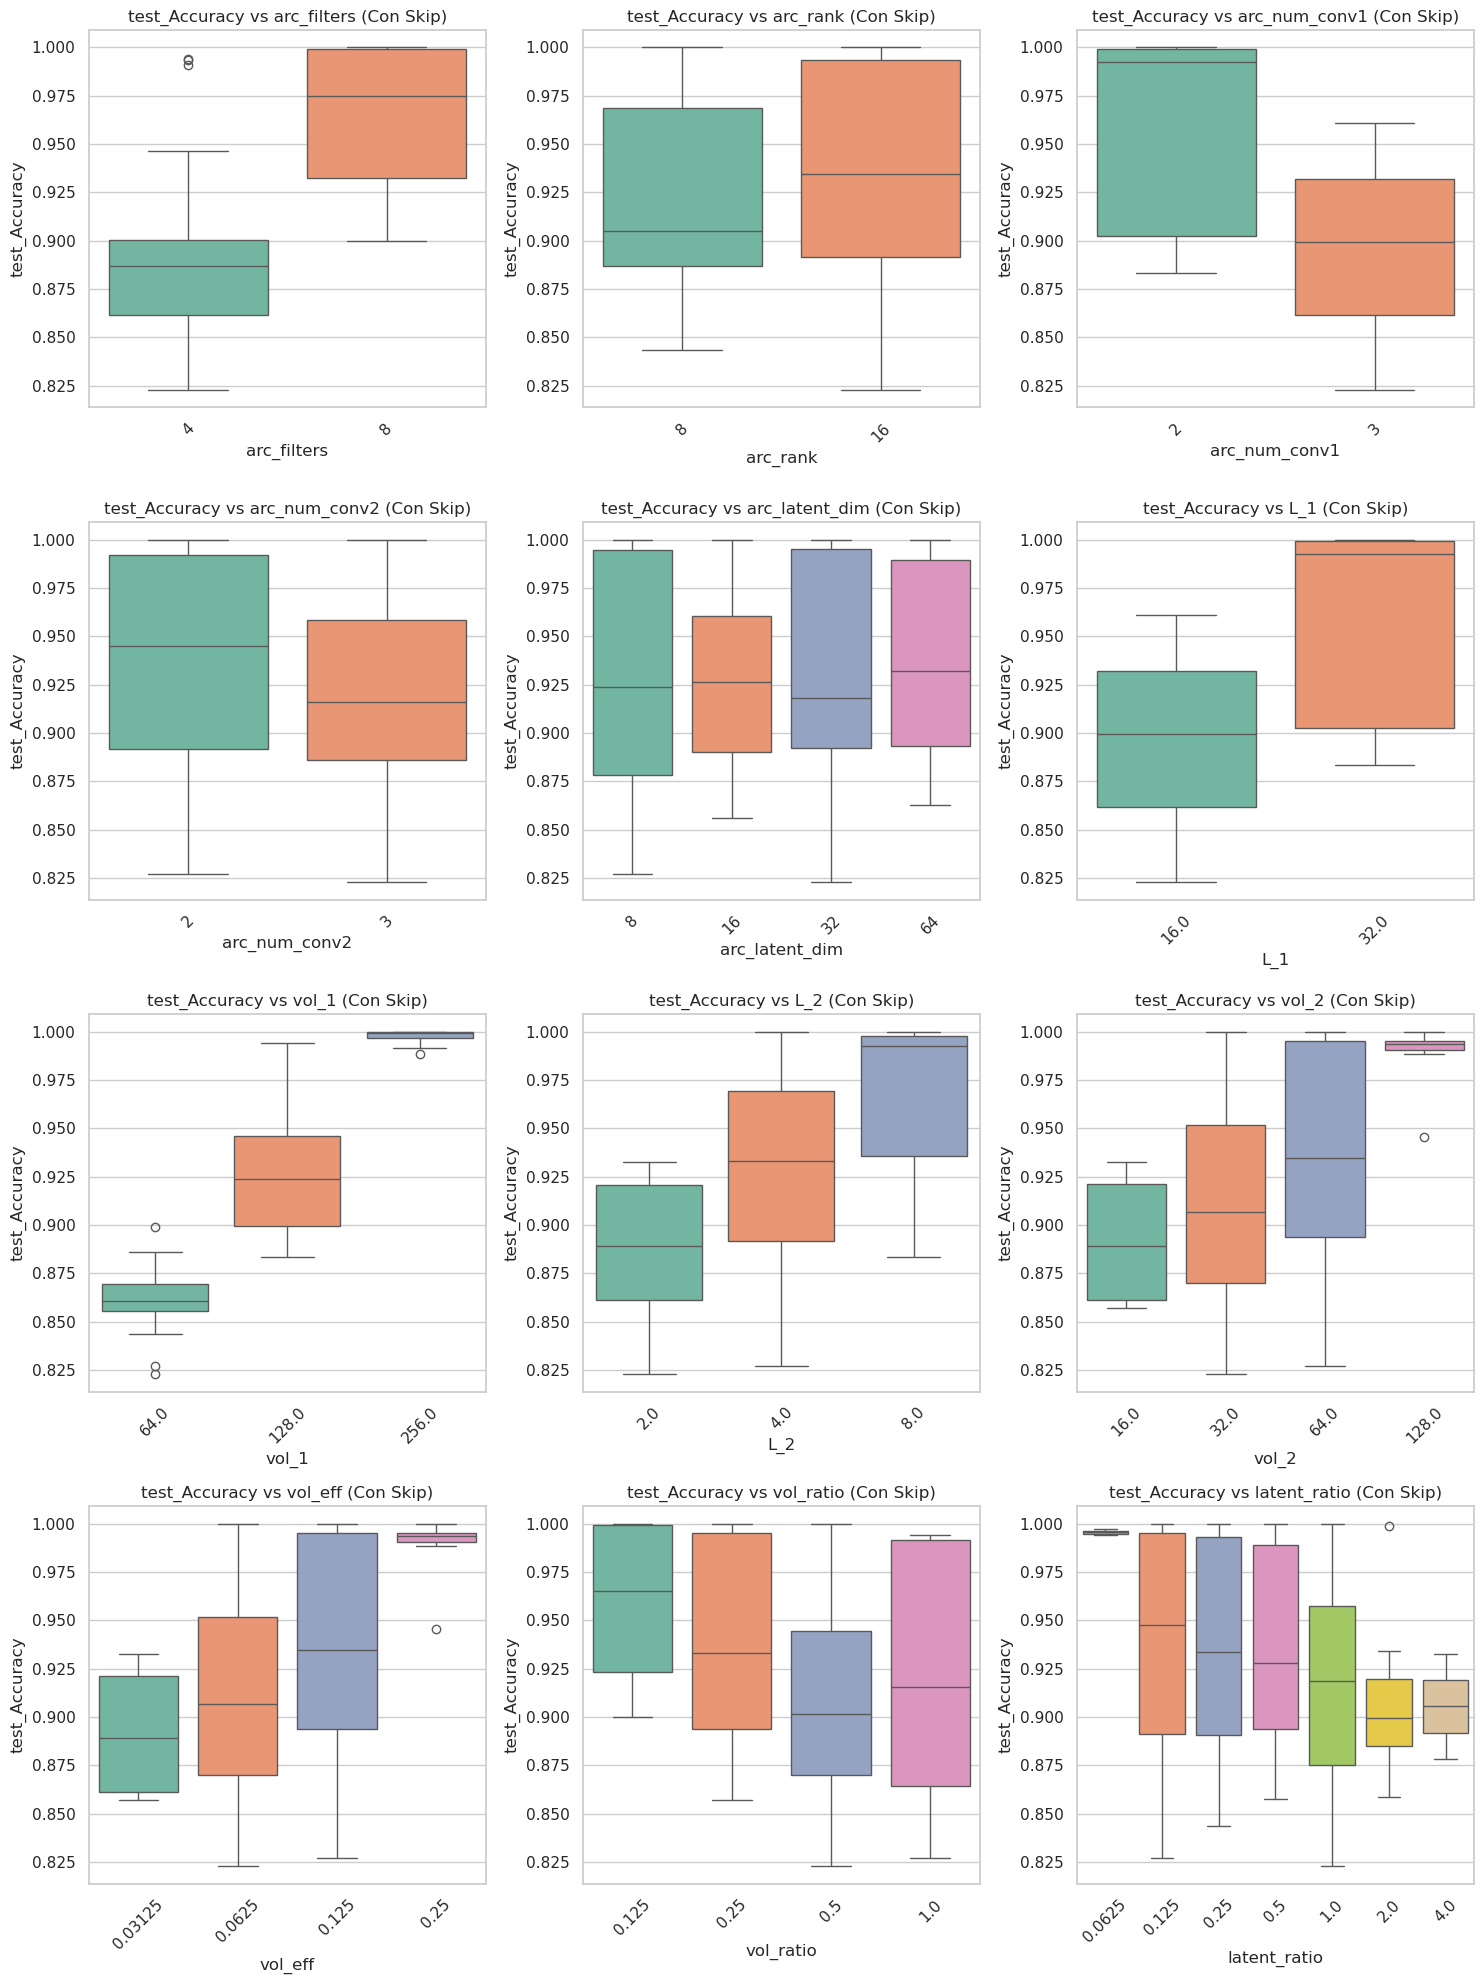

In [65]:
# Versión para modelos CON skip connections
plot_accuracy_by_fields(
    data_skip, fields, accuracy_field, ncols=3, title_suffix="(Con Skip)"
)

/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/327982071.py:51: FutureWarning

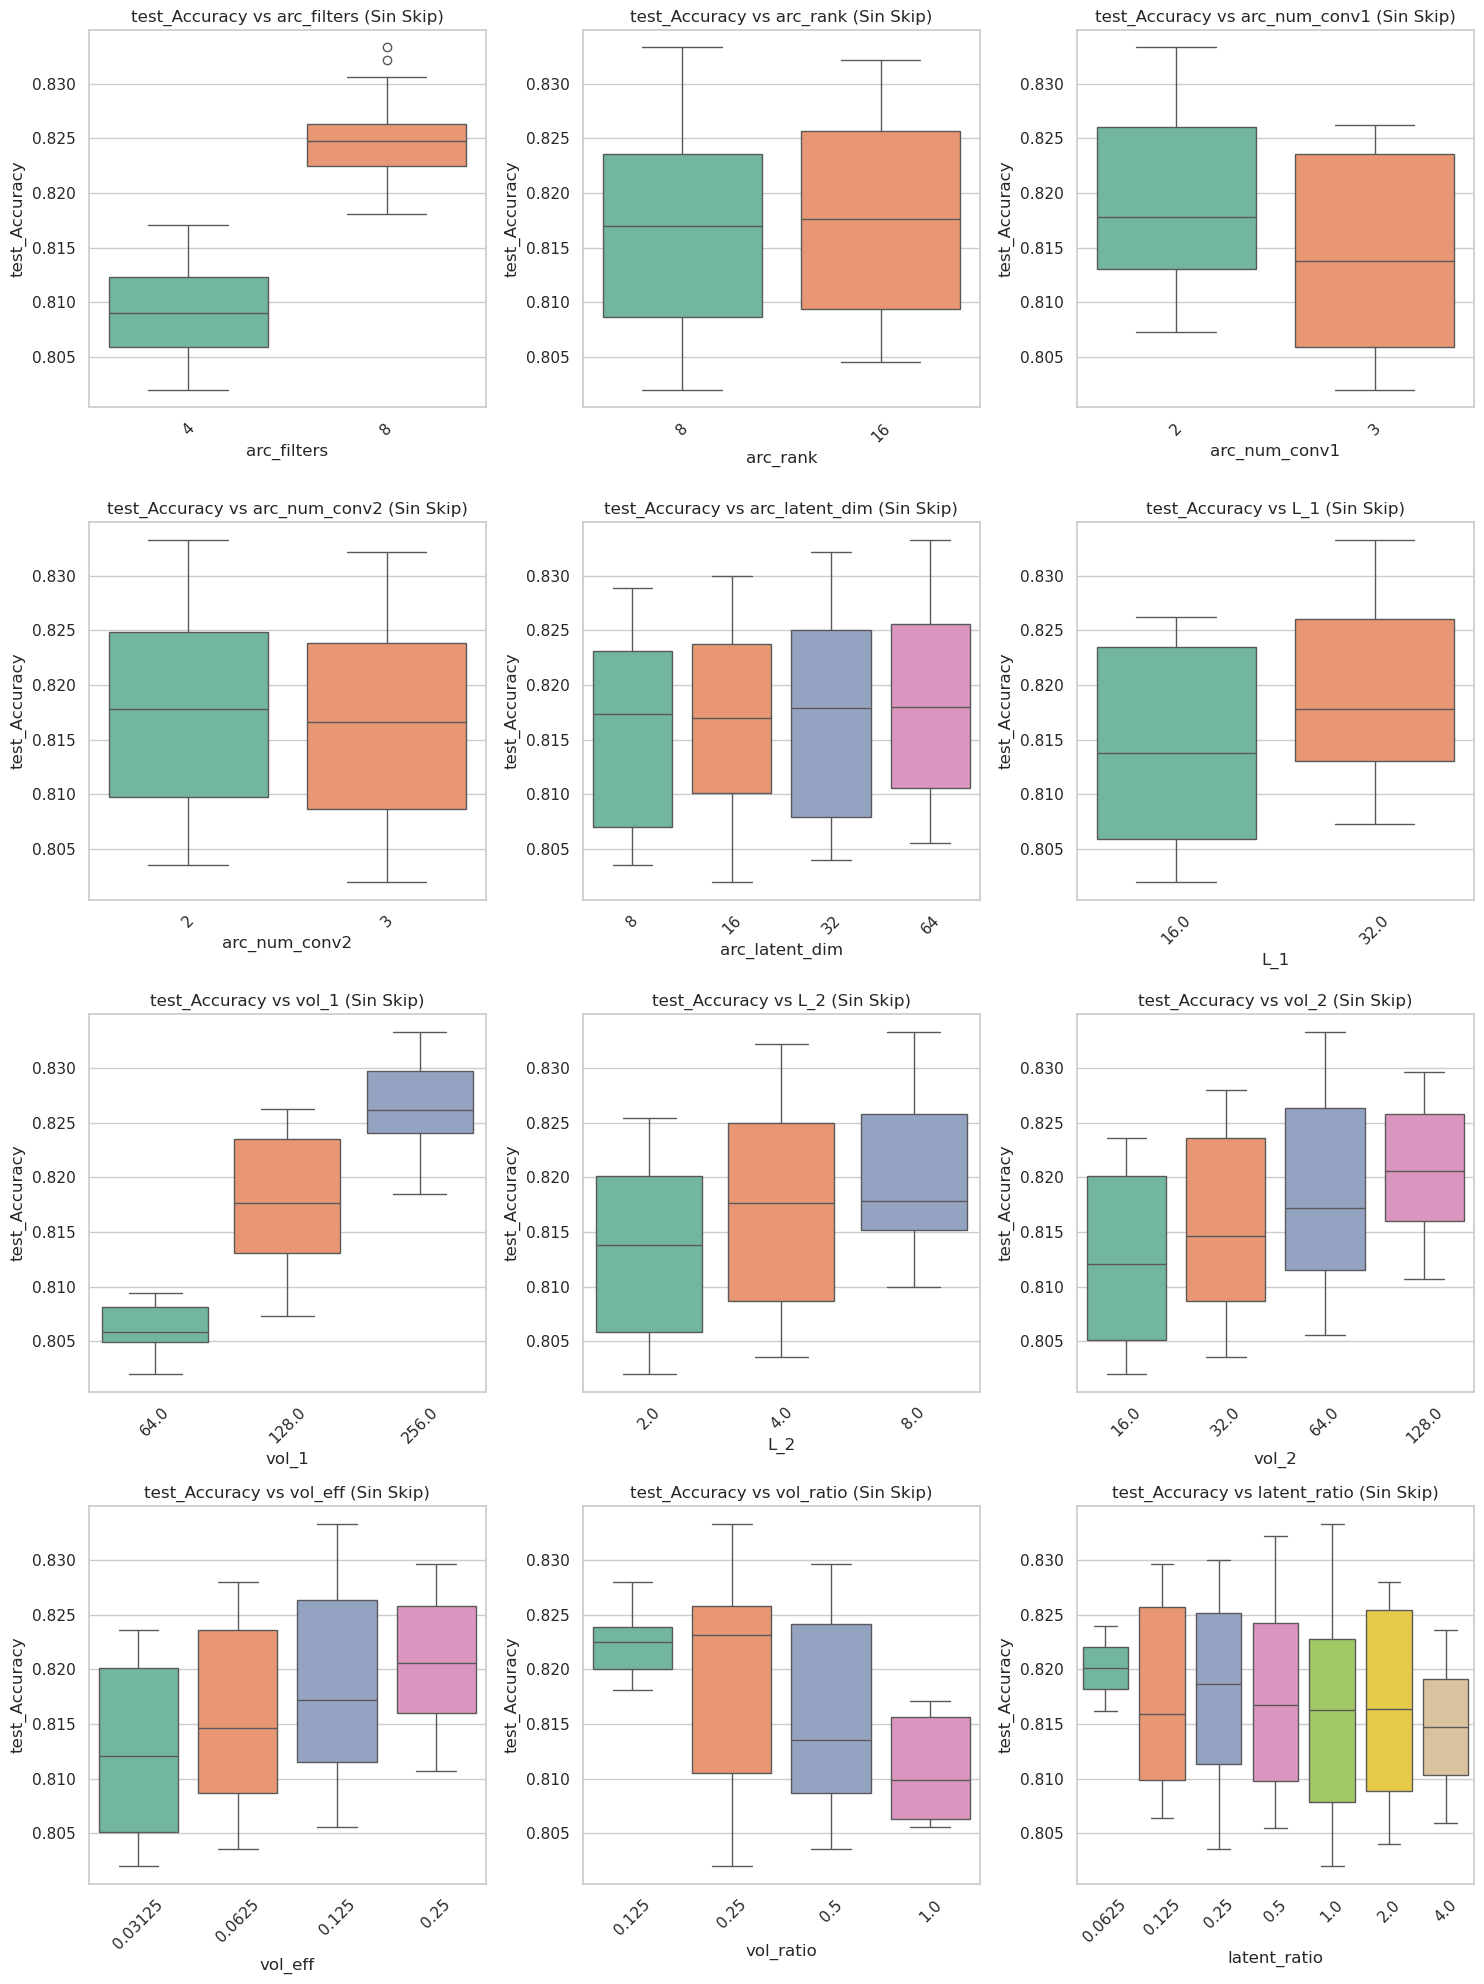

In [66]:
# Versión para modelos SIN skip connections
plot_accuracy_by_fields(
    data_no_skip, fields, accuracy_field, ncols=3, title_suffix="(Sin Skip)"
)

/tmp/ipykernel_683433/1333738205.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bin", y=accuracy_field, data=df_skip, ax=axs[i, 0], palette="Set2")
/tmp/ipykernel_683433/1333738205.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_683433/1333738205.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bin", y=accuracy_field, data=df_skip, ax=axs[i, 0], palette="Set2")
/tmp/ipykernel_683433/1333738205.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

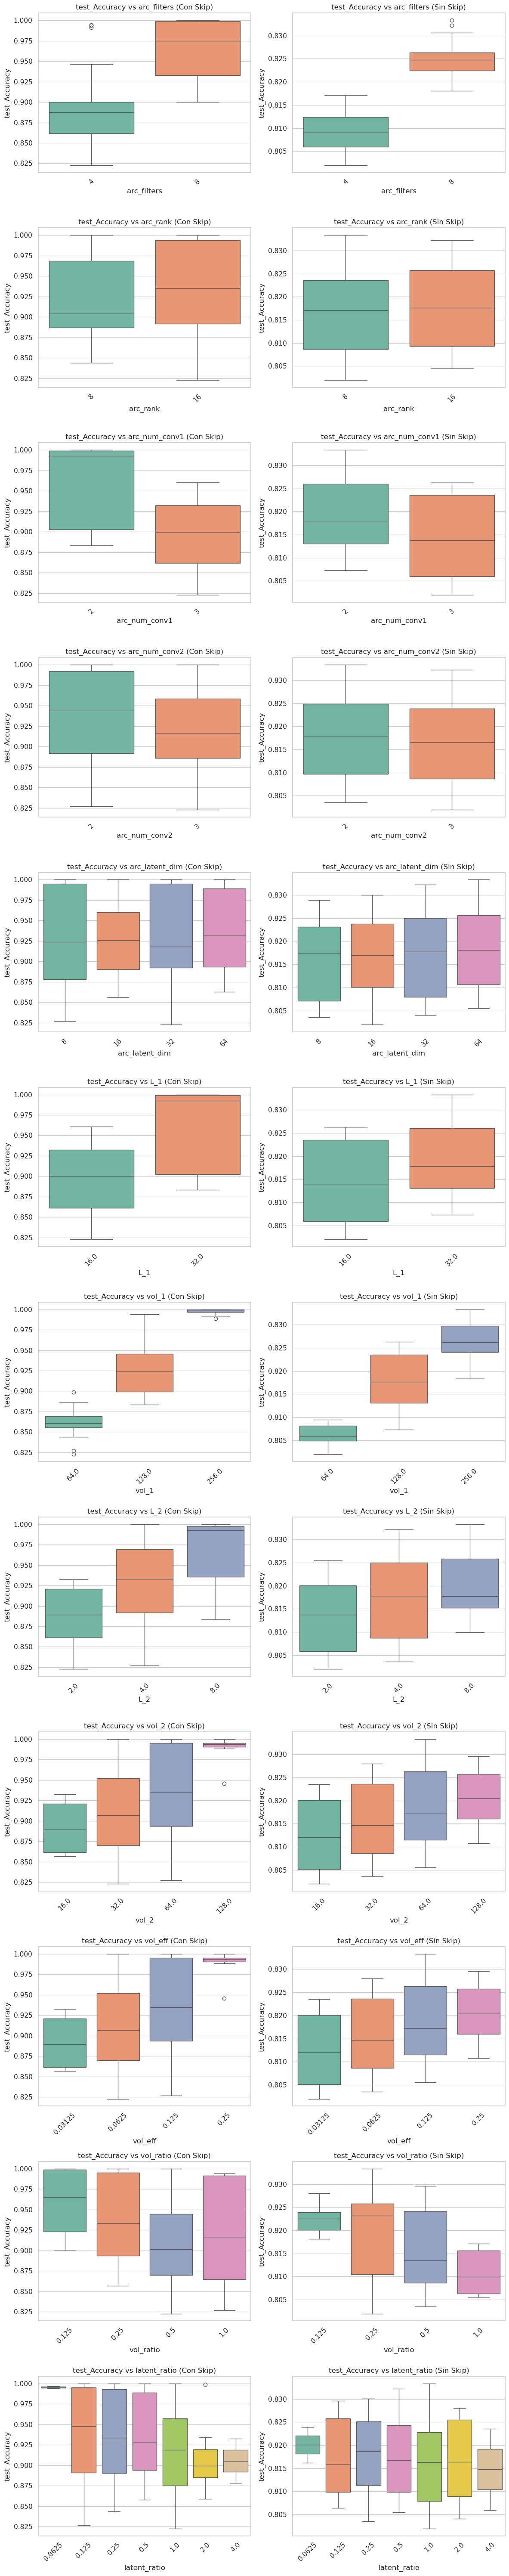

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Listas de campos
cols_arq = [
    "arc_num_params",
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
]
cols_vol = ["L_1", "vol_1", "L_2", "vol_2", "vol_eff", "vol_ratio", "latent_ratio"]
accuracy_field = "test_Accuracy"
fields = cols_arq + cols_vol

# Filtrar los DataFrames para modelos con y sin skip connections
data_skip = df[df["arc_skip"] == 1]
data_no_skip = df[df["arc_skip"] == 0]


def preparar_bins(df, field):
    """
    Devuelve una copia del DataFrame con una columna 'bin' en función del campo.
    Si el campo es numérico y tiene muchos valores únicos, se genera el binning (qcut).
    """
    df_tmp = df.copy()
    if pd.api.types.is_numeric_dtype(df_tmp[field]) and df_tmp[field].nunique() > 10:
        try:
            df_tmp["bin"] = pd.qcut(df_tmp[field], q=4, duplicates="drop")
        except Exception:
            df_tmp["bin"] = df_tmp[field]
    else:
        df_tmp["bin"] = df_tmp[field]
    return df_tmp


# Definir el número de filas (una por campo) y 2 columnas
nfields = len(fields)
fig, axs = plt.subplots(nfields, 2, figsize=(12, nfields * 5), squeeze=False)

for i, field in enumerate(fields):
    # Preparar los datos con bins para el campo en cada subconjunto
    df_skip = preparar_bins(data_skip, field)
    df_no_skip = preparar_bins(data_no_skip, field)

    # Boxplot para modelos CON skip connections (columna izquierda)
    sns.boxplot(x="bin", y=accuracy_field, data=df_skip, ax=axs[i, 0], palette="Set2")
    axs[i, 0].set_title(f"{accuracy_field} vs {field} (Con Skip)")
    axs[i, 0].set_xlabel(field)
    axs[i, 0].set_ylabel(accuracy_field)
    axs[i, 0].tick_params(axis="x", rotation=45)

    # Boxplot para modelos SIN skip connections (columna derecha)
    sns.boxplot(
        x="bin", y=accuracy_field, data=df_no_skip, ax=axs[i, 1], palette="Set2"
    )
    axs[i, 1].set_title(f"{accuracy_field} vs {field} (Sin Skip)")
    axs[i, 1].set_xlabel(field)
    axs[i, 1].set_ylabel(accuracy_field)
    axs[i, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Top 20 modelos según score_norm (test_Accuracy / (vol_1/mediana_vol1 + vol_2/mediana_vol2)):


,name,arc_skip_conn,arc_num_conv1,arc_num_conv2,arc_filters,arc_rank,vol_1,vol_2,test_Accuracy,score_norm
118,num_convs-3-3-f4-r8-ld64,1,3,3,4,8,64.0,16.0,0.878191,1.185557
119,num_convs-3-3-f4-r8-ld8,1,3,3,4,8,64.0,16.0,0.862288,1.164089
117,num_convs-3-3-f4-r8-ld32,1,3,3,4,8,64.0,16.0,0.858777,1.159349
116,num_convs-3-3-f4-r8-ld16,1,3,3,4,8,64.0,16.0,0.856858,1.156758
54,num_convs-3-3-f4-r8-ld64,0,3,3,4,8,64.0,16.0,0.805976,1.088067
55,num_convs-3-3-f4-r8-ld8,0,3,3,4,8,64.0,16.0,0.805487,1.087408
53,num_convs-3-3-f4-r8-ld32,0,3,3,4,8,64.0,16.0,0.804048,1.085464
52,num_convs-3-3-f4-r8-ld16,0,3,3,4,8,64.0,16.0,0.801960,1.082646
102,num_convs-3-2-f4-r8-ld64,1,3,2,4,8,64.0,32.0,0.898875,0.866773
112,num_convs-3-3-f4-r16-ld16,1,3,3,4,16,64.0,32.0,0.870050,0.838977


/tmp/ipykernel_683433/716775658.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


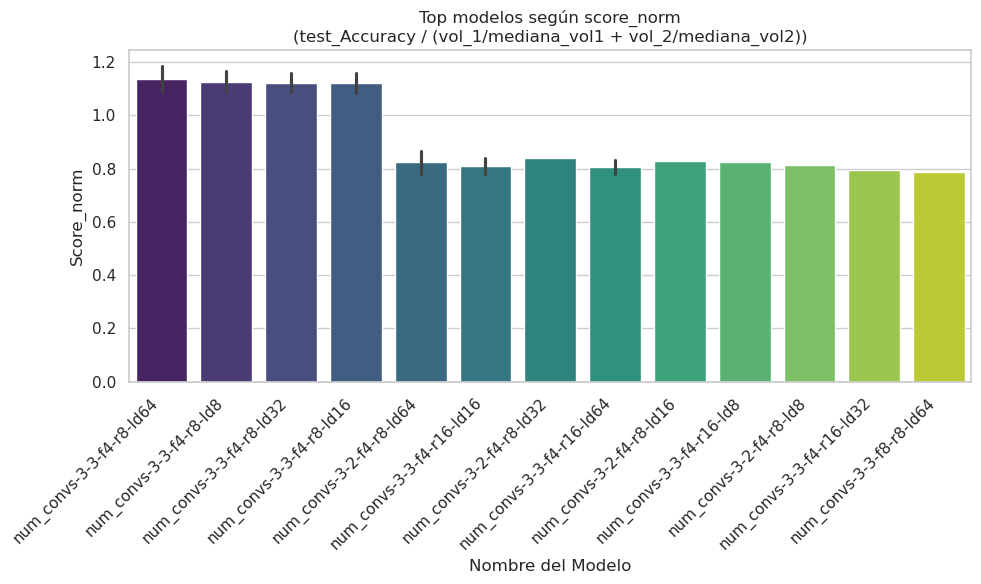

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las medianas de vol_1 y vol_2
median_vol1 = df["vol_1"].mean()
median_vol2 = df["vol_2"].mean()


# Calcular la métrica compuesta normalizada
df["score_norm"] = df["test_Accuracy"] / (
    (df["vol_1"] / median_vol1) + (df["vol_2"] / median_vol2)
)

# Mostrar los primeros 20 modelos según esta métrica
N = 20
best_models_norm = df.nlargest(N, "score_norm")

print(
    f"Top {N} modelos según score_norm (test_Accuracy / (vol_1/mediana_vol1 + vol_2/mediana_vol2)):"
)
display(
    best_models_norm[
        [
            "name",
            "arc_skip",
            "arc_num_conv",
            "arc_num_params",
            "arc_features",
            "vol_1",
            "vol_2",
            "test_Accuracy",
            "score_norm",
        ]
    ].sort_values(by="score_norm", ascending=False)
)

# Visualización: Gráfico de barras de los mejores modelos según score_norm
plt.figure(figsize=(10, 6))
sns.barplot(
    x="name",
    y="score_norm",
    data=best_models_norm.sort_values(by="score_norm", ascending=False),
    palette="viridis",
)
plt.title(
    "Top modelos según score_norm\n(test_Accuracy / (vol_1/mediana_vol1 + vol_2/mediana_vol2))"
)
plt.xlabel("Nombre del Modelo")
plt.ylabel("Score_norm")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Calcular Z-scores para vol_1 y vol_2
df["z_vol1"] = (df["vol_1"] - df["vol_1"].mean()) / df["vol_1"].std()
df["z_vol2"] = (df["vol_2"] - df["vol_2"].mean()) / df["vol_2"].std()

# Calcular la métrica score_z
df["score_z"] = df["test_Accuracy"] / (
    df["z_vol1"].abs() + df["z_vol2"].abs() + 1
)
# Seleccionar los mejores modelos según score_z
best_models_z = df.nlargest(N, "score_z")
print("Top modelos según score_z:")
display(
    best_models_z[
        [
            "name",
            "arc_skip",
            "arc_num_conv",
            "arc_num_params",
            "arc_features",
            "vol_1",
            "vol_2",
            "test_Accuracy",
            "score_norm",
            "score_z",
        ]
    ]
)

Top modelos según score_z:


,name,arc_skip_conn,arc_num_conv1,arc_num_conv2,arc_filters,arc_rank,vol_1,vol_2,test_Accuracy,score_norm,score_z
107,num_convs-3-2-f8-r16-ld8,1,3,2,8,16,128.0,64.0,0.949943,0.458008,0.620449
82,num_convs-2-3-f4-r16-ld64,1,2,3,4,16,128.0,64.0,0.946239,0.456222,0.618029
104,num_convs-3-2-f8-r16-ld16,1,3,2,8,16,128.0,64.0,0.943831,0.455061,0.616457
105,num_convs-3-2-f8-r16-ld32,1,3,2,8,16,128.0,64.0,0.937348,0.451936,0.612223
106,num_convs-3-2-f8-r16-ld64,1,3,2,8,16,128.0,64.0,0.931733,0.449229,0.608555
81,num_convs-2-3-f4-r16-ld32,1,2,3,4,16,128.0,64.0,0.918710,0.442949,0.600049
69,num_convs-2-2-f4-r8-ld32,1,2,2,4,8,128.0,64.0,0.905577,0.436617,0.591471
68,num_convs-2-2-f4-r8-ld16,1,2,2,4,8,128.0,64.0,0.904322,0.436012,0.590652
80,num_convs-2-3-f4-r16-ld16,1,2,3,4,16,128.0,64.0,0.897116,0.432538,0.585945
83,num_convs-2-3-f4-r16-ld8,1,2,3,4,16,128.0,64.0,0.893605,0.430845,0.583652


In [ ]:
df["score_mean"] = (df["score_norm"] + df["score_z"]) / 2
# Calcular Z-scores para vol_1 y vol_2
# Seleccionar los mejores modelos según score_z
best_models_z = df.nlargest(N, "score_mean")
print("Top modelos según score_mean:")
display(
    best_models_z[
        [
            "name",
            "arc_skip",
            "arc_num_conv",
            "arc_num_params",
            "arc_features",
            "vol_1",
            "vol_2",
            "test_Accuracy",
            "score_norm",
            "score_z",
            "score_mean",
        ]
    ]
)

Top modelos según score_mean:


,name,arc_skip_conn,arc_num_conv1,arc_num_conv2,arc_filters,arc_rank,vol_1,vol_2,test_Accuracy,score_norm,score_z,score_mean
118,num_convs-3-3-f4-r8-ld64,1,3,3,4,8,64.0,16.0,0.878191,1.185557,0.266746,0.726152
119,num_convs-3-3-f4-r8-ld8,1,3,3,4,8,64.0,16.0,0.862288,1.164089,0.261915,0.713002
117,num_convs-3-3-f4-r8-ld32,1,3,3,4,8,64.0,16.0,0.858777,1.159349,0.260849,0.710099
116,num_convs-3-3-f4-r8-ld16,1,3,3,4,8,64.0,16.0,0.856858,1.156758,0.260266,0.708512
54,num_convs-3-3-f4-r8-ld64,0,3,3,4,8,64.0,16.0,0.805976,1.088067,0.244811,0.666439
55,num_convs-3-3-f4-r8-ld8,0,3,3,4,8,64.0,16.0,0.805487,1.087408,0.244662,0.666035
53,num_convs-3-3-f4-r8-ld32,0,3,3,4,8,64.0,16.0,0.804048,1.085464,0.244225,0.664845
52,num_convs-3-3-f4-r8-ld16,0,3,3,4,8,64.0,16.0,0.801960,1.082646,0.243591,0.663118
102,num_convs-3-2-f4-r8-ld64,1,3,2,4,8,64.0,32.0,0.898875,0.866773,0.320092,0.593432
126,num_convs-3-3-f8-r8-ld64,1,3,3,8,8,128.0,16.0,0.932651,0.786924,0.392172,0.589548
